<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age               303 non-null int64
sex               303 non-null int64
cp                303 non-null int64
trestbps          303 non-null int64
chol              303 non-null int64
fbs               303 non-null int64
restecg           303 non-null int64
thalach           303 non-null int64
exang             303 non-null int64
oldpeak           303 non-null float64
slop              303 non-null int64
ca                303 non-null object
thal              303 non-null object
pred_attribute    303 non-null int64
dtypes: float64(1), int64(11), object(2)
memory usage: 33.2+ KB


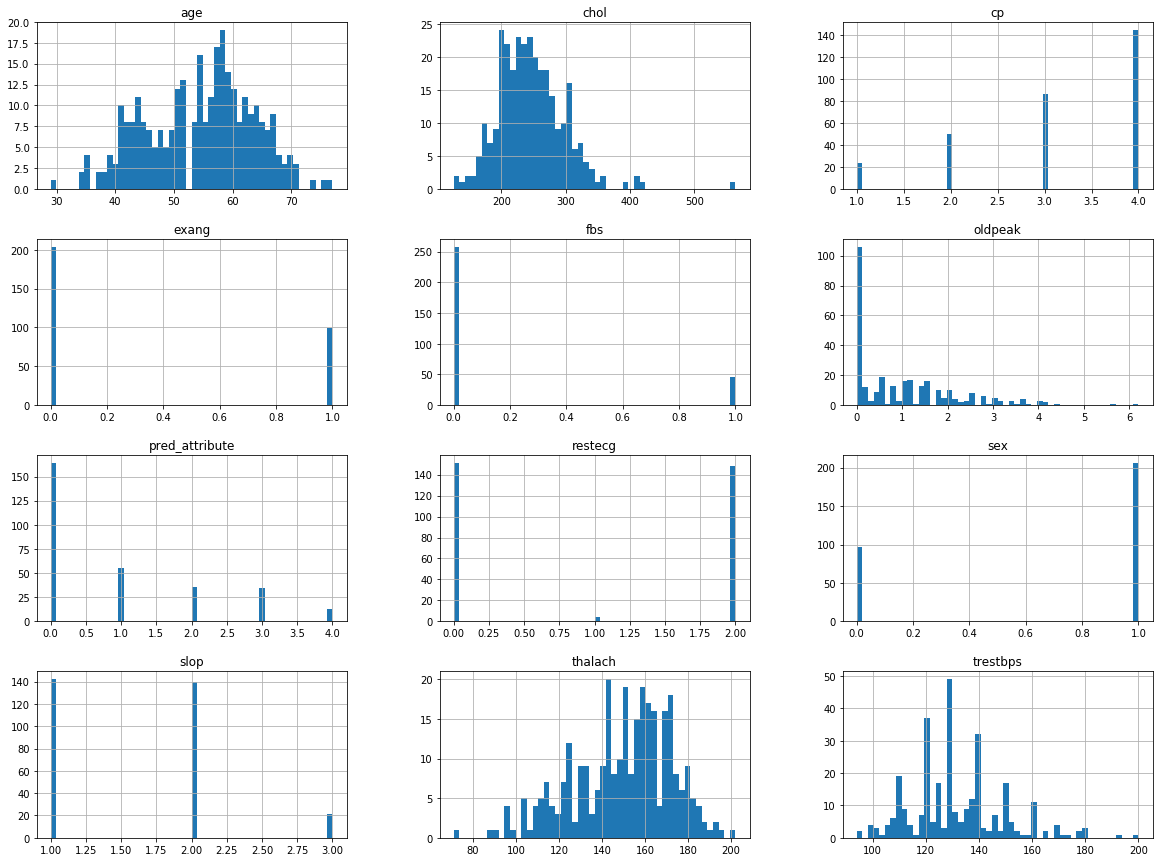

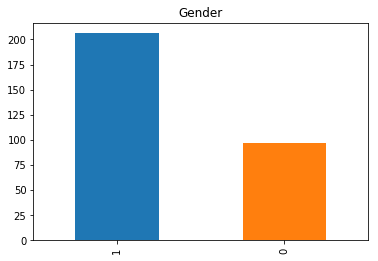

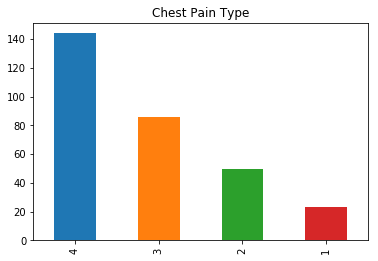

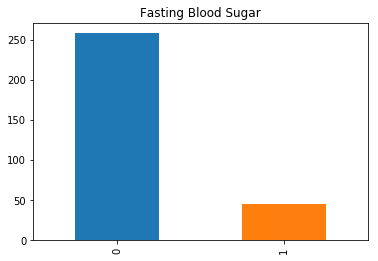

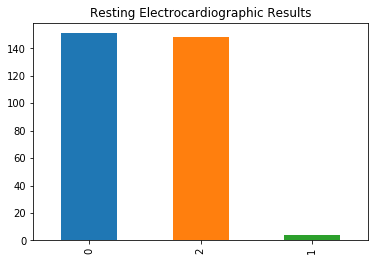

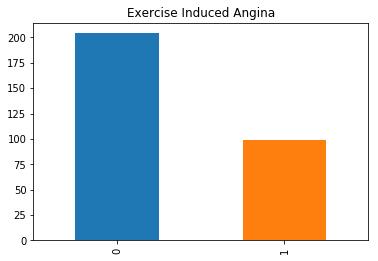

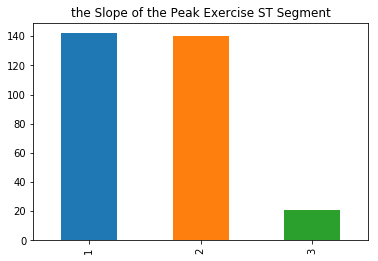

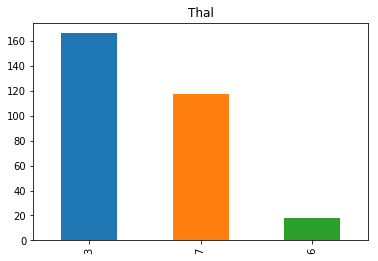

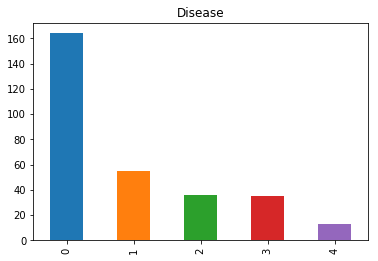

(242, 13) (61, 13) (242,) (61,)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [148]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

HEART_PATH = os.path.join("datasets", "heart")

def load_heart_data(filename, heart_path=HEART_PATH):
    csv_path = os.path.join(heart_path, filename)
    return pd.read_csv(csv_path)

if __name__=="__main__":
    heart = load_heart_data("heart.csv")
    df = pd.DataFrame(heart)
    #heart.head()
    heart.info()
    heart.shape
    heart.isnull().sum()
    #?되어있는 값 NaN 처리
    heart.replace('?', np.nan, inplace=True)
    heart.isnull().sum()
    heart["sex"].value_counts()
    heart["cp"].value_counts()
    heart["fbs"].value_counts()
    heart["restecg"].value_counts()
    heart["exang"].value_counts()
    heart["slop"].value_counts()
    heart["thal"].value_counts()
    heart["pred_attribute"].value_counts()
    #데이터 통계 확인
    heart.describe()
    #히스토그램
    heart.hist(bins=50, figsize=(20,15))
    plt.show()
    #각 열 특징 도표
    plt.show(heart["sex"].value_counts().plot(kind='bar', title="Gender"))
    #plt.show(heart["trestbps"].value_counts().plot(kind='bar', title="Trestbps"))
    #plt.show(heart["chol"].value_counts().plot(kind='bar', title="Chol"))
    #plt.show(heart["thalach"].value_counts().plot(kind='bar', title="Talach"))
    #plt.show(heart["oldpeak"].value_counts().plot(kind='bar', title="Oldpeak"))
    plt.show(heart["cp"].value_counts().plot(kind='bar', title="Chest Pain Type"))
    plt.show(heart["fbs"].value_counts().plot(kind='bar', title="Fasting Blood Sugar"))
    plt.show(heart["restecg"].value_counts().plot(kind='bar', title="Resting Electrocardiographic Results"))
    plt.show(heart["exang"].value_counts().plot(kind='bar', title="Exercise Induced Angina"))
    plt.show(heart["slop"].value_counts().plot(kind='bar', title="the Slope of the Peak Exercise ST Segment"))
    plt.show(heart["thal"].value_counts().plot(kind='bar', title="Thal"))
    plt.show(heart["pred_attribute"].value_counts().plot(kind='bar', title="Disease"))
    #pred_attribute 특성 1,2,3,4를 1로 변경,이진분류를 하기 위함.
    heart["pred_attribute"].replace(inplace=True, value=[1,1,1,1], to_replace=[1,2,3,4])
    #test, train 셋트 분리
    X = heart.iloc[:,:-1]
    y = heart.iloc[:,-1]
    #8:2으로 나눔
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=42)
    print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
    #로지스틱 회귀
    lg = LogisticRegression()
    #모델 적용
    lg.fit(X_train, y_train)
    #학습예측 데이터 y_pred 대입
    y_pred = lg.predict(X_test)

    #시험데이터 결과
    print(confusion_matrix(y_test,y_pred))
    print(("정확도:"),accuracy_score(y_test,y_pred))
    print(("정밀도:"),precision_score(y_test,y_pred))
    print(("재현률:"),recall_score(y_test,y_pred))
    #confusion matrix
    import seaborn as sns
    plt.figure(figsize=(5,5))
    sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)
    #로지스틱 회귀 train 정확도
    print(lg.score(X_train,y_train))
    #test 정확도
    print(lg.score(X_test,y_test))
    #Decision Tree
    dt = DecisionTreeClassifier(max_depth = 3)
    #결정트리 모델 적용
    dt.fit(X_train, y_train)
    #학습예측 데이터 y_pred 대입
    y_pred = dt.predict(X_test)
    #시험데이터 결과
    print(confusion_matrix(y_test,y_pred))
    print(("정확도:"),accuracy_score(y_test,y_pred))
    print(("정밀도:"),precision_score(y_test,y_pred))
    print(("재현률:"),recall_score(y_test,y_pred))
    #confusion matrix
    plt.figure(figsize=(5,5))
    sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)
    #결정트리 train,test 정확도
    print(dt.score(X_train,y_train))
    print(dt.score(X_test, y_test))
    #Random Forest 
    rf = RandomForestClassifier(n_estimators = 10, random_state=42)
    #랜덤포리스트 모델 적용
    rf.fit(X_train, y_train)
    #학습예측 데이터 y_pred 대입
    y_pred = rf.predict(X_test)
    #시험데이터 결과
    print(confusion_matrix(y_test,y_pred))
    print(("정확도:"),accuracy_score(y_test,y_pred))
    print(("정밀도:"),precision_score(y_test,y_pred))
    print(("재현률:"),recall_score(y_test,y_pred))
    #print(("ROC:"),roc_auc_score(y_test, y_pred))
    plt.figure(figsize=(5,5))
    sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)

    #랜덤포리스트 train,test 정확도
    print(rf.score(X_train,y_train))
    print(rf.score(X_test, y_test))
    
    #교차검증을 사용한 정확도 측정
    #로지스틱 회귀
    scores = cross_val_score(lg, X_train,y_train,cv=3,scoring="accuracy")
    scores = cross_val_score(lg, X_test,y_test,cv=3,scoring="accuracy")
    print(scores.mean())
    #결정트리
    scores = cross_val_score(dt, X_train,y_train,cv=3,scoring="accuracy")
    scores = cross_val_score(dt, X_test,y_test,cv=3,scoring="accuracy")
    print(scores.mean())
    #랜덤포레스트
    scores = cross_val_score(rf, X_train,y_train,cv=3,scoring="accuracy")
    scores = cross_val_score(rf, X_test,y_test,cv=3,scoring="accuracy")
    print(scores.mean())

     
    
    

In [166]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

HEART_PATH = os.path.join("datasets", "heart")

def load_heart_data(filename, heart_path=HEART_PATH):
    csv_path = os.path.join(heart_path, filename)
    return pd.read_csv(csv_path)

if __name__=="__main__":
    heart = load_heart_data("heart.csv")
    df = pd.DataFrame(heart)

In [167]:
heart.head()
      

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal,pred_attribute
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [168]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age               303 non-null int64
sex               303 non-null int64
cp                303 non-null int64
trestbps          303 non-null int64
chol              303 non-null int64
fbs               303 non-null int64
restecg           303 non-null int64
thalach           303 non-null int64
exang             303 non-null int64
oldpeak           303 non-null float64
slop              303 non-null int64
ca                303 non-null object
thal              303 non-null object
pred_attribute    303 non-null int64
dtypes: float64(1), int64(11), object(2)
memory usage: 33.2+ KB


In [169]:
heart.shape

(303, 14)

In [170]:
heart.isnull().sum()

age               0
sex               0
cp                0
trestbps          0
chol              0
fbs               0
restecg           0
thalach           0
exang             0
oldpeak           0
slop              0
ca                0
thal              0
pred_attribute    0
dtype: int64

In [171]:
#?되어있는 값 NaN 처리
heart.replace('?', np.nan, inplace=True)
heart.isnull().sum()

age               0
sex               0
cp                0
trestbps          0
chol              0
fbs               0
restecg           0
thalach           0
exang             0
oldpeak           0
slop              0
ca                4
thal              2
pred_attribute    0
dtype: int64

In [172]:
#범주형 데이터 확인
heart["sex"].value_counts()
heart["cp"].value_counts()
heart["fbs"].value_counts()
heart["restecg"].value_counts()
heart["exang"].value_counts()
heart["slop"].value_counts()
heart["thal"].value_counts()
heart["pred_attribute"].value_counts()

0    164
1     55
2     36
3     35
4     13
Name: pred_attribute, dtype: int64

In [173]:
#데이터 통계 확인
heart.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,pred_attribute
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [40]:
def bar_chart(feature):
    no_disease = heart[heart['pred_attribute']==0][feature].value_counts()
    disease = heart[heart['pred_attribute'] == 1][feature].value_counts()
    #male = heart[heart['sex'] == 1][feature].value_counts()
    #female = heart[heart['sex'] == 0][feature].value_counts()
    df = pd.DataFrame([no_disease,disease])
    df.index = ['Nodisease','Disease']
    df.plot(kind='bar', stacked=True, figsize=(10,5))

In [174]:
#thal 특성 3,6,7을 1,2,3로 변경
#heart["thal"].replace(inplace=True, value=[1,2,3], to_replace=[3,6,7])
#pred_attribute 특성 1,2,3,4를 1로 변경,이진분류를 하기 위함.
heart["pred_attribute"].replace(inplace=True, value=[1,1,1,1], to_replace=[1,2,3,4])
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal,pred_attribute
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


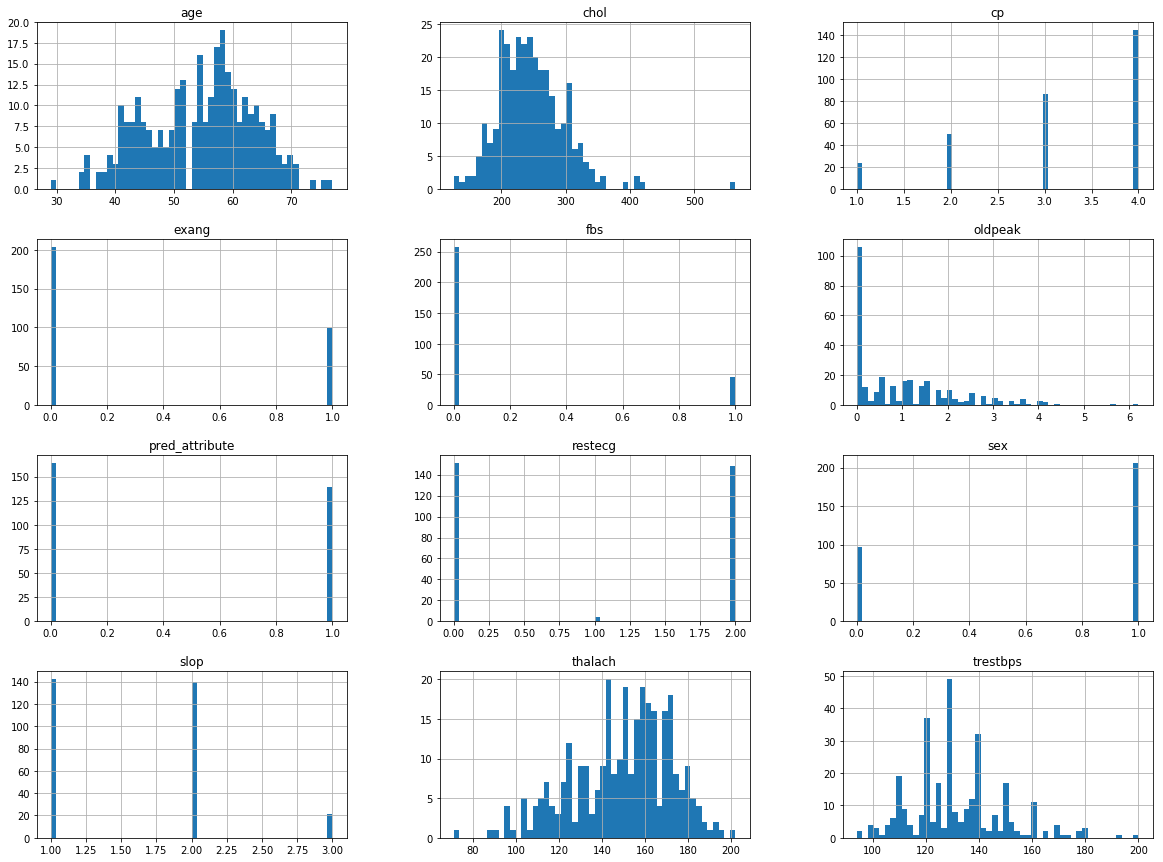

In [175]:
#히스토그램
heart.hist(bins=50, figsize=(20,15))
plt.show()

In [10]:
#성별 기준 심장병 발병(음성,양성)여부
bar_chart('sex')

NameError: name 'bar_chart' is not defined

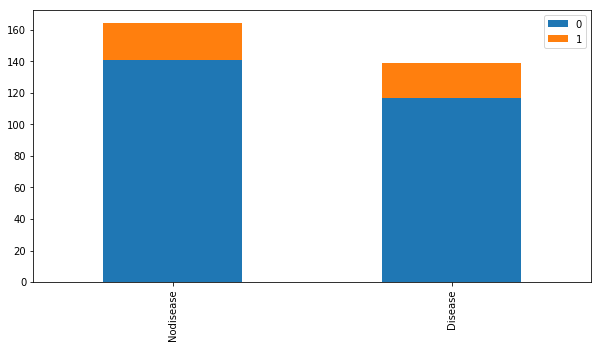

In [46]:
bar_chart('fbs')

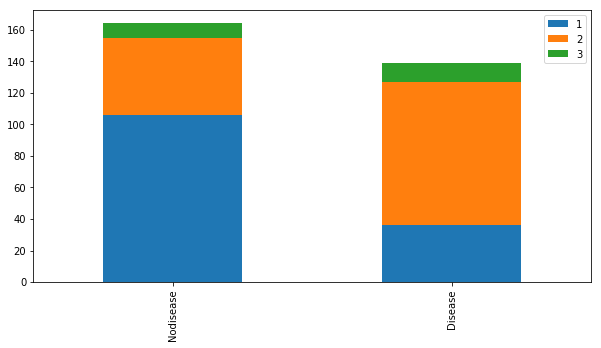

In [47]:
bar_chart('slop')

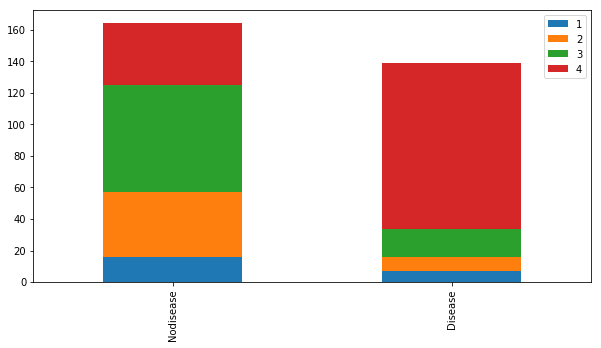

In [49]:
bar_chart('cp')

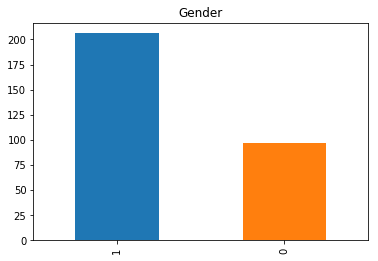

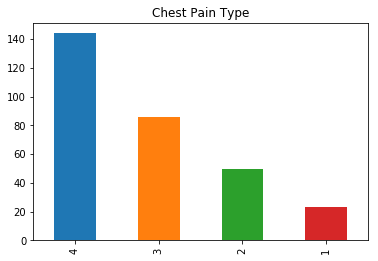

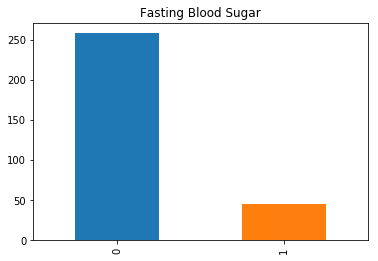

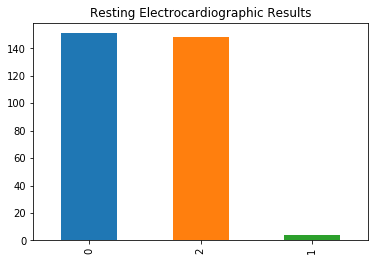

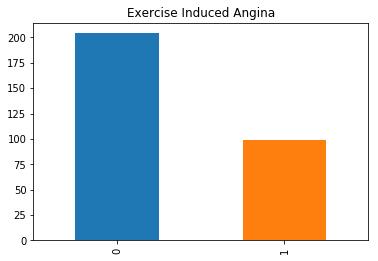

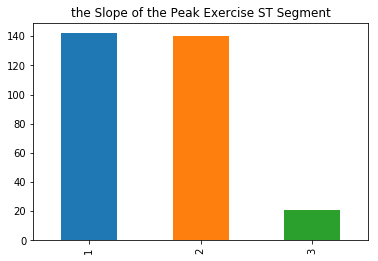

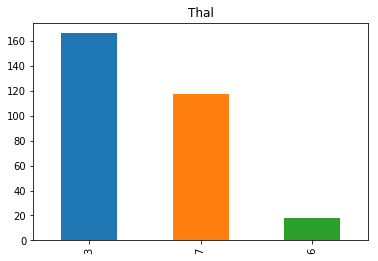

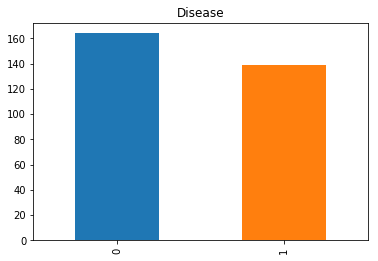

In [176]:
#각 열 특징 도표
plt.show(heart["sex"].value_counts().plot(kind='bar', title="Gender"))
#plt.show(heart["trestbps"].value_counts().plot(kind='bar', title="Trestbps"))
#plt.show(heart["chol"].value_counts().plot(kind='bar', title="Chol"))
#plt.show(heart["thalach"].value_counts().plot(kind='bar', title="Talach"))
#plt.show(heart["oldpeak"].value_counts().plot(kind='bar', title="Oldpeak"))
plt.show(heart["cp"].value_counts().plot(kind='bar', title="Chest Pain Type"))
plt.show(heart["fbs"].value_counts().plot(kind='bar', title="Fasting Blood Sugar"))
plt.show(heart["restecg"].value_counts().plot(kind='bar', title="Resting Electrocardiographic Results"))
plt.show(heart["exang"].value_counts().plot(kind='bar', title="Exercise Induced Angina"))
plt.show(heart["slop"].value_counts().plot(kind='bar', title="the Slope of the Peak Exercise ST Segment"))
plt.show(heart["thal"].value_counts().plot(kind='bar', title="Thal"))
plt.show(heart["pred_attribute"].value_counts().plot(kind='bar', title="Disease"))

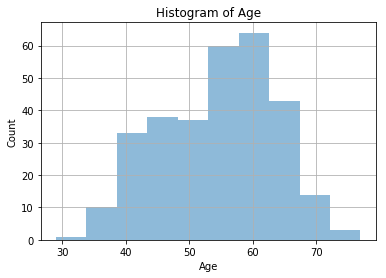

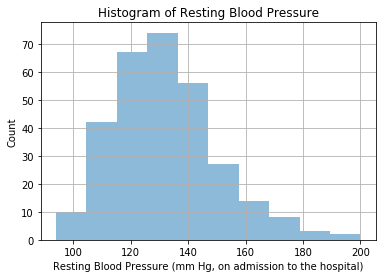

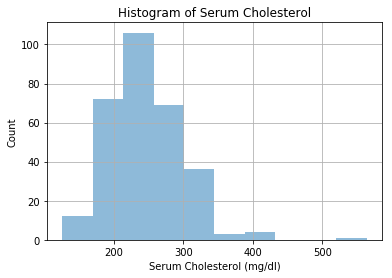

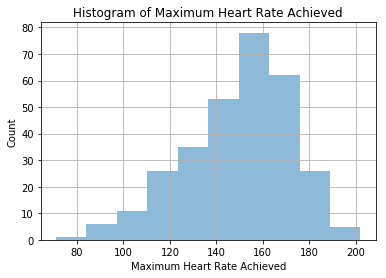

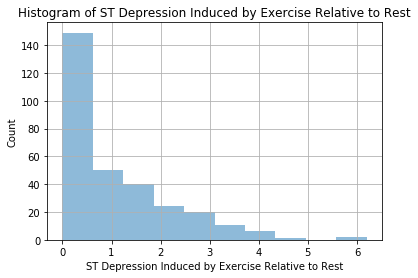

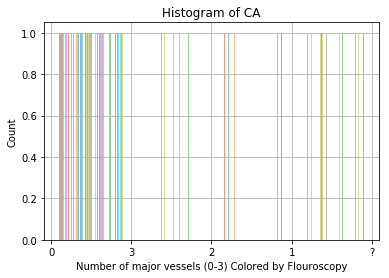

In [9]:
#히스토그램 - 나이
plt.hist(heart["age"], bins=10, alpha=0.5)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age")
plt.grid(True)
plt.show()

#trestbps
plt.hist(heart["trestbps"], bins=10, alpha=0.5)
plt.xlabel("Resting Blood Pressure (mm Hg, on admission to the hospital)")
plt.ylabel("Count")
plt.title("Resting Blood Pressure")
plt.grid(True)
plt.show()

#chol
plt.hist(heart["chol"], bins=10, alpha=0.5)
plt.xlabel("Serum Cholesterol (mg/dl)")
plt.ylabel("Count")
plt.title("Serum Cholesterol")
plt.grid(True)
plt.show()

#thal
plt.hist(heart["thalach"], bins=10, alpha=0.5)
plt.xlabel("Maximum Heart Rate Achieved")
plt.ylabel("Count")
plt.title("Maximum Heart Rate Achieved")
plt.grid(True)
plt.show()

#oldpeak
plt.hist(heart["oldpeak"], bins=10, alpha=0.5)
plt.xlabel("ST Depression Induced by Exercise Relative to Rest")
plt.ylabel("Count")
plt.title("ST Depression Induced by Exercise Relative to Rest")
plt.grid(True)
plt.show()

#ca

plt.hist(heart["ca"], bins=4, alpha=0.5)
plt.xlabel("Number of major vessels (0-3) Colored by Flouroscopy")
plt.ylabel("Count")
plt.title("CA")
plt.grid(True)
plt.show()


In [177]:
#heart_copy = heart.copy()
#corr_matrix = heart_copy.corr()
#print(corr_matrix(ascending=False))
heart.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,pred_attribute
age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.223120
sex,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.276816
cp,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.414446
trestbps,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.150825
chol,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.085164
fbs,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.025264
restecg,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.169202
thalach,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.417167
exang,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.431894
oldpeak,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.424510


In [25]:
#one-hot-encoding
#X = heart.drop('pred_attribute', axis=1)
#y = pd.DataFrame(heart['pred_attribute'])
#X.head()
#y.head()

#X = pd.get_dummies(X)
#X.head()
#X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slop', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'thal_3',
       'thal_6', 'thal_7'],
      dtype='object')

In [178]:

# 열특성 ca,thal ?된 값 중간값으로 채우기
heart.replace("?", np.nan, inplace=True)
heart["thal"] = heart["thal"].fillna(heart["thal"].median())
heart["ca"] = heart["ca"].fillna(heart["ca"].median())
#pred_attribute 특성 1,2,3,4를 1로 변경
heart["pred_attribute"].replace(inplace=True, value=[1,1,1,1], to_replace=[1,2,3,4])
heart.head()
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,pred_attribute
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [179]:
#test, train 셋트 분리
X = heart.iloc[:,:-1]
y = heart.iloc[:,-1]
#7:3으로 나눔
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(242, 13) (61, 13) (242,) (61,)


In [28]:
#min_max_scaler = preprocessing.MinMaxScaler().fit(X_train)
#data_train_norm = min_max_scaler.transform(X_train)
#data_test_norm = min_max_scaler.transform(X_test)

In [29]:
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)
scaler = StandardScaler()
X = scaler.fit_transform(X)
X.std()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


1.0

In [30]:
X_train.shape

(242, 13)

In [145]:
#교차검증을 사용한 정확도 측정
#로지스틱 회귀
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lg, X_train,y_train,cv=3,scoring="accuracy")
scores = cross_val_score(lg, X_test,y_test,cv=3,scoring="accuracy")
print(scores.mean())
#결정트리
scores = cross_val_score(dt, X_train,y_train,cv=3,scoring="accuracy")
scores = cross_val_score(dt, X_test,y_test,cv=3,scoring="accuracy")
print(scores.mean())
#랜덤포레스트
scores = cross_val_score(rf, X_train,y_train,cv=3,scoring="accuracy")
scores = cross_val_score(rf, X_test,y_test,cv=3,scoring="accuracy")
print(scores.mean())


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

0.8521303258145364
0.7184628237259817
0.785296574770259


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [180]:
#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import accuracy_score, confusion_matrix
#from sklearn.metrics import precision_score, recall_score
#from sklearn.metrics import roc_auc_score
#from pandas.plotting import scatter_matrix
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.preprocessing import StandardScaler
#from sklearn.impute import SimpleImputer
#from sklearn.model_selection import cross_val_score


from sklearn.linear_model import LogisticRegression
#로지스틱 회귀
lg = LogisticRegression()
#모델 적용
lg.fit(X_train, y_train)
#학습예측 데이터 y_pred 대입
y_pred = lg.predict(X_test)

#시험데이터 결과
print(confusion_matrix(y_test,y_pred))
print(("정확도:"),accuracy_score(y_test,y_pred))
print(("정밀도:"),precision_score(y_test,y_pred))
print(("재현률:"),recall_score(y_test,y_pred))

[[26  3]
 [ 3 29]]
정확도: 0.9016393442622951
정밀도: 0.90625
재현률: 0.90625


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


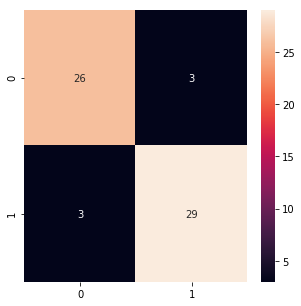

In [181]:
lg.score(X_train,y_train)
#print(y_test,y_pred)
#print('accuracy_score is on test data: ',accuracy_score(y_test,y_pred))
#confusion matrix
import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)
#plt.ylabel('actual class')
#plt.xlabel('predicted class')


In [161]:
#ROC 곡선
fpr, tpr, threshold = roc_curve(y_test,y_pred)
plot_roc_curve(fpr, tpr)
plt.show()

ValueError: multiclass format is not supported

In [182]:
#로지스틱 회귀 train 정확도
print(lg.score(X_train,y_train))
#test 정확도
print(lg.score(X_test,y_test))

0.8347107438016529
0.9016393442622951


In [163]:
from sklearn.tree import DecisionTreeClassifier
#Decision Tree
dt = DecisionTreeClassifier(max_depth = 3)
#결정트리 모델 적용
dt.fit(X_train, y_train)
#학습예측 데이터 y_pred 대입
y_pred = dt.predict(X_test)
#시험데이터 결과
print(confusion_matrix(y_test,y_pred))
print(("정확도:"),accuracy_score(y_test,y_pred))
print(("정밀도:"),precision_score(y_test,y_pred))
print(("재현률:"),recall_score(y_test,y_pred))
#confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)
#plt.ylabel('actual class')
#plt.xlabel('predicted class')

[[27  0  0  2  0]
 [ 2  0  5  5  0]
 [ 2  0  5  2  0]
 [ 2  0  4  1  0]
 [ 1  0  2  1  0]]
정확도: 0.5409836065573771


ValueError: Target is multiclass but average='binary'. Please choose another average setting.

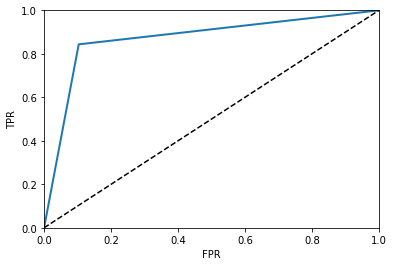

In [115]:
fpr, tpr, threshold = roc_curve(y_test,y_pred)
plot_roc_curve(fpr, tpr)
plt.show()

In [164]:
#결정트리 train,test 정확도
print(dt.score(X_train,y_train))
print(dt.score(X_test, y_test))

0.6363636363636364
0.5409836065573771


In [165]:
from sklearn.ensemble import RandomForestClassifier
#Decision Tree
dt = DecisionTreeClassifier(max_depth = 3)
#결정트리 모델 적용
dt.fit(X_train, y_train)
#학습예측 데이터 y_pred 대입
y_pred = dt.predict(X_test)
#시험데이터 결과
print(confusion_matrix(y_test,y_pred))
print(("정확도:"),accuracy_score(y_test,y_pred))
print(("정밀도:"),precision_score(y_test,y_pred))
print(("재현률:"),recall_score(y_test,y_pred))
#confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)
#결정트리 train,test 정확도
print(dt.score(X_train,y_train))
print(dt.score(X_test, y_test))
#Random Forest 
rf = RandomForestClassifier(n_estimators = 10, random_state=42)
#랜덤포리스트 모델 적용
rf.fit(X_train, y_train)
#학습예측 데이터 y_pred 대입
y_pred = rf.predict(X_test)
#시험데이터 결과
print(confusion_matrix(y_test,y_pred))
print(("정확도:"),accuracy_score(y_test,y_pred))
print(("정밀도:"),precision_score(y_test,y_pred))
print(("재현률:"),recall_score(y_test,y_pred))
#print(("ROC:"),roc_auc_score(y_test, y_pred))
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)
#plt.ylabel('actual class')
#plt.xlabel('predicted class')

[[27  0  0  2  0]
 [ 2  0  5  5  0]
 [ 2  0  5  2  0]
 [ 2  0  4  1  0]
 [ 1  0  2  1  0]]
정확도: 0.5409836065573771


ValueError: Target is multiclass but average='binary'. Please choose another average setting.

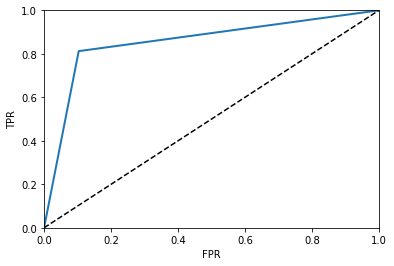

In [117]:
fpr, tpr, threshold = roc_curve(y_test,y_pred)
plot_roc_curve(fpr, tpr)
plt.show()

In [135]:
#랜덤포리스트 train,test 정확도
print(rf.score(X_train,y_train))
print(rf.score(X_test, y_test))

0.987603305785124
0.8524590163934426


In [136]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred,pos_label=1)
print(fpr)
print(tpr)

[0.         0.10344828 1.        ]
[0.     0.8125 1.    ]


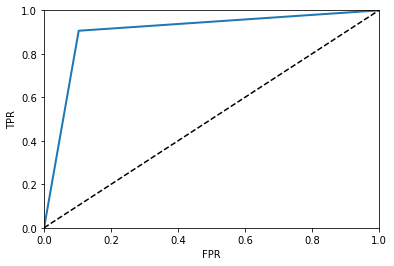

In [144]:
from sklearn.metrics import roc_curve

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    
fpr, tpr, threshold = roc_curve(y_test,y_pred)
plot_roc_curve(fpr, tpr)
plt.show()